## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification   # generating categorical data

In [11]:
# x independent feature
# y dependent feature
X,y=make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], random_state=1) #0.90 means majority=90% and minority=10%

In [12]:
X,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [14]:
import pandas as pd
df1=pd.DataFrame(X, columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1, df2], axis=1)

In [15]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [16]:
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

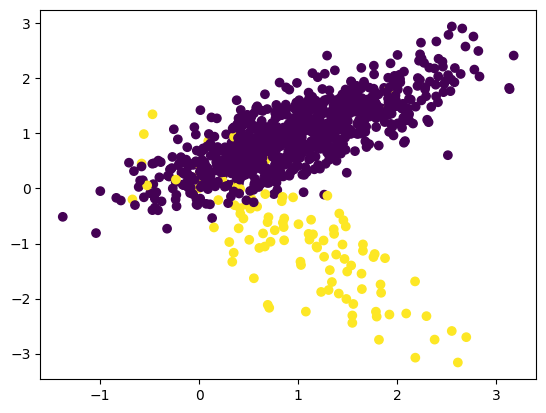

In [18]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])
# blue color is majority datapoints
# yellow color is minority datapoints

In [19]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [20]:
from imblearn.over_sampling import SMOTE

In [22]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])  #every new point generated will have x axis and y axis

In [23]:
X.shape

(1788, 2)

In [24]:
y.shape

(1788,)

In [25]:
y==0

0       False
1        True
2        True
3        True
4        True
        ...  
1783    False
1784    False
1785    False
1786    False
1787    False
Name: target, Length: 1788, dtype: bool

In [26]:
y[y==0]

1      0
2      0
3      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 894, dtype: int32

In [27]:
len(y[y==0])

894

In [28]:
len(y[y==1])   # pehle 106 tha ab 894 ho gya

894

In [29]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

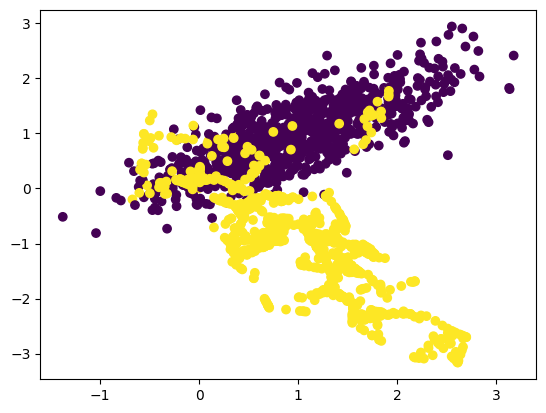

In [30]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

# clearly see data points looks like balanced